In [1]:
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format

In [2]:
flights = pd.read_csv("Data/FlightDelays.csv")

len(flights)

103361

In [3]:
flights.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'Unnamed: 21'],
      dtype='object')

In [4]:
flights.info()

flights["carrier"] = flights["carrier"].astype("category")
flights["carrier_name"] = flights["carrier_name"].astype("category")
flights["airport"] = flights["airport"].astype("category")
flights["airport_name"] = flights["airport_name"].astype("category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103361 entries, 0 to 103360
Data columns (total 22 columns):
year                   103361 non-null int64
 month                 103361 non-null int64
carrier                103361 non-null object
carrier_name           103361 non-null object
airport                103361 non-null object
airport_name           103361 non-null object
arr_flights            103240 non-null float64
arr_del15              103220 non-null float64
carrier_ct             103240 non-null float64
 weather_ct            103240 non-null float64
nas_ct                 103240 non-null float64
security_ct            103240 non-null float64
late_aircraft_ct       103240 non-null float64
arr_cancelled          103240 non-null float64
arr_diverted           103240 non-null float64
 arr_delay             103240 non-null float64
 carrier_delay         103240 non-null float64
weather_delay          103240 non-null float64
nas_delay              103240 non-null float64
secu

In [5]:
flights.drop([' arr_delay'], axis=1, inplace=True)
flights.drop([' carrier_delay'], axis=1, inplace=True)
flights.drop(['weather_delay'], axis=1, inplace=True)
flights.drop(['nas_delay'], axis=1, inplace=True)
flights.drop(['security_delay'], axis=1, inplace=True)
flights.drop(['late_aircraft_delay'], axis=1, inplace=True)

In [6]:
flights.info()
flights.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103361 entries, 0 to 103360
Data columns (total 16 columns):
year                103361 non-null int64
 month              103361 non-null int64
carrier             103361 non-null category
carrier_name        103361 non-null category
airport             103361 non-null category
airport_name        103361 non-null category
arr_flights         103240 non-null float64
arr_del15           103220 non-null float64
carrier_ct          103240 non-null float64
 weather_ct         103240 non-null float64
nas_ct              103240 non-null float64
security_ct         103240 non-null float64
late_aircraft_ct    103240 non-null float64
arr_cancelled       103240 non-null float64
arr_diverted        103240 non-null float64
Unnamed: 21         0 non-null float64
dtypes: category(4), float64(10), int64(2)
memory usage: 10.1 MB


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,Unnamed: 21
0,2010,1,9E,Pinnacle Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",65,16,5,0,11,0,0,1,0,nan
1,2010,1,9E,Pinnacle Airlines Inc.,AEX,"Alexandria, LA: Alexandria International",60,17,5,0,8,0,4,4,0,nan
2,2010,1,9E,Pinnacle Airlines Inc.,ALB,"Albany, NY: Albany International",81,34,10,1,20,0,3,1,1,nan
3,2010,1,9E,Pinnacle Airlines Inc.,ALO,"Waterloo, IA: Waterloo Regional",3,1,0,0,1,0,0,0,0,nan
4,2010,1,9E,Pinnacle Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1067,271,43,9,156,0,63,46,4,nan


In [7]:
flights = flights.rename(columns={' month': 'Month', 'arr_del15': 'Arrival_Delay', 'carrier_ct':'Carrier_Delay', ' weather_ct': 'Weather_Delay',
                        'nas_ct': 'NAS_Delay', 'security_ct': "Security_Delays", 'late_aircraft_ct': 'Late_Aircraft_Delay', 
                        'arr_cancelled': 'Cancelled', 'arr_diverted': 'Diverted',
                        'year': 'Year'
                       }
              )

In [8]:
flights = flights.rename(columns={'Security_Delays' :"Security_Delay"})

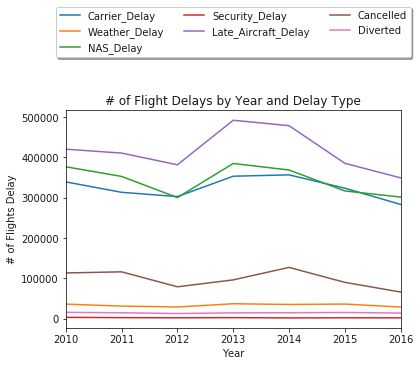

In [96]:
df2 = flights.groupby('Year')['Carrier_Delay', 'Weather_Delay', 'NAS_Delay', 'Security_Delay','Late_Aircraft_Delay','Cancelled','Diverted'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.xlabel('Year')
plt.ylabel('# of Flights Delay')
plt.title('# of Flight Delays by Year and Delay Type')
plt.show()

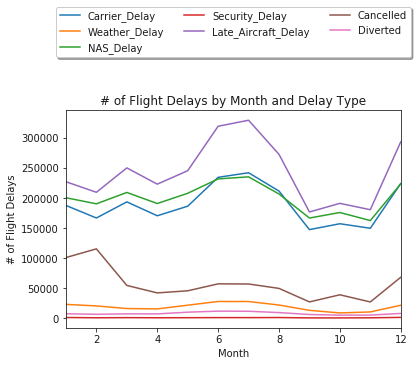

In [99]:
df2 = flights.groupby('Month')['Carrier_Delay', 'Weather_Delay', 'NAS_Delay', 'Security_Delay','Late_Aircraft_Delay','Cancelled','Diverted'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.xlabel('Month')
plt.ylabel('# of Flight Delays')
plt.title('# of Flight Delays by Month and Delay Type')
plt.show()

In [11]:
vis1 = sns.lmplot(data=flights, x="Weather_Delay", y="NAS_Delay", fit_reg=False,hue="Month", size=6, aspect=1)

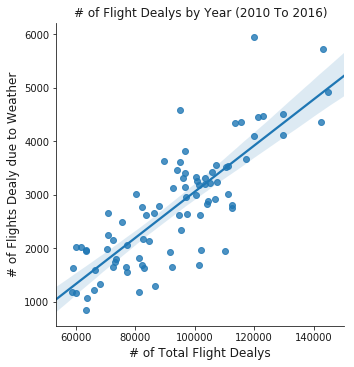

In [98]:
df2 = flights.groupby(['Year', 'Month'])['Arrival_Delay','Carrier_Delay', 'Weather_Delay', 'NAS_Delay', 'Security_Delay','Late_Aircraft_Delay','Cancelled','Diverted'].sum()

df3 = df2.reset_index()

#vis1 = sns.lmplot(data=df3, x="Arrival_Delay", y="Weather_Delay", hue = "Year", col="Year", x_jitter=.1)
vis1 = sns.lmplot(data=df3, x="Arrival_Delay", y="Weather_Delay", x_jitter=.1)
plt.gca()
plt.title("# of Flight Dealys by Year (2010 To 2016)")
plt.xlabel("# of Total Flight Dealys", fontsize=12)
plt.ylabel("# of Flights Dealy due to Weather", fontsize=12)


plt.show()

In [13]:
genlist = []
mylabels = []

for gen in df3["Year"].cat.categories:
    genlist.append(df3[df3["Year"] == gen]["Arrival_Delay"])
    mylabels.append(gen)
plt.hist(genlist, stacked = True, bins=10, rwidth=1, label=mylabels)
plt.legend()
plt.show()

AttributeError: Can only use .cat accessor with a 'category' dtype

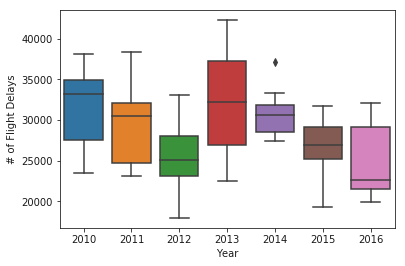

In [24]:
z = sns.boxplot(data=df3, x='Year', y='NAS_Delay')
z.set(xlabel='Year', ylabel='# of Flight Delays')
plt.show()

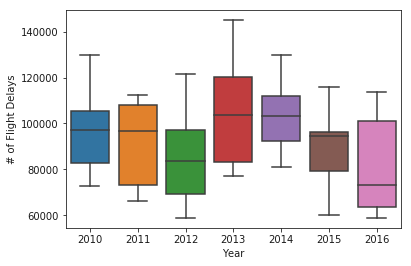

In [32]:
z = sns.boxplot(data=df3, x='Year', y='Arrival_Delay')
z.set(xlabel='Year', ylabel='# of Flight Delays')
plt.show()

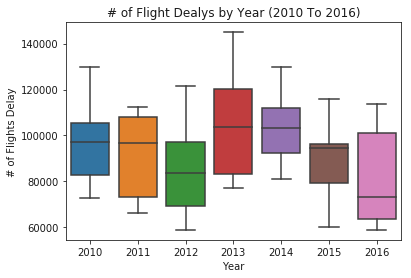

In [66]:
z = sns.boxplot(data=df3, x='Year', y='Arrival_Delay')
z.set(xlabel='Year', ylabel='# of Flights Delay')
z.set_title('# of Flight Dealys by Year (2010 To 2016)')
plt.show()

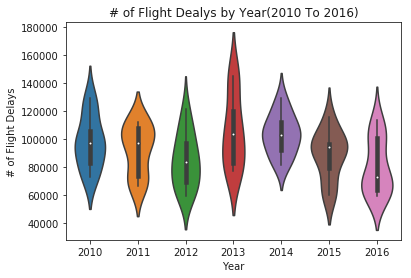

In [67]:
z = sns.violinplot(data=df3, x='Year', y='Arrival_Delay')
z.set(xlabel='Year', ylabel='# of Flight Delays')
z.set_title('# of Flight Dealys by Year(2010 To 2016)')
plt.show()


/Users/ashishshrivastava/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


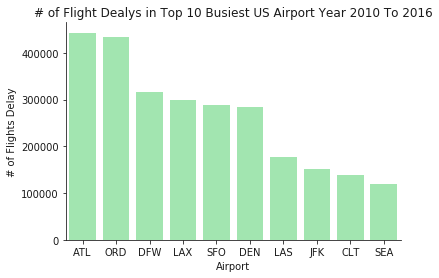

In [110]:
flights_airport = flights.groupby(['airport'])['Arrival_Delay','Carrier_Delay', 'Weather_Delay', 'NAS_Delay', 'Security_Delay','Late_Aircraft_Delay','Cancelled','Diverted'].sum()

flights_airport_noindex = flights_airport.reset_index()

flights_top10_airport = flights_airport_noindex[flights_airport_noindex['airport'].isin(['ATL','LAX', 'ORD', 'DFW', 'JFK', 'DEN','SFO','LAS', 'CLT', 'SEA'])]

#flights_top10_airport = flights_airport_noindex[flights_airport_noindex['Year'].isin(['2010','2011'])]

flights_top10_airport["airport"] = flights_top10_airport["airport"].astype("str")

flights_top10_airport_sorted = flights_top10_airport.sort_values('Arrival_Delay',ascending=False)

sns.set_color_codes("pastel")

#, order=flights_top10_airport["airport"]

z = sns.barplot(x= "airport", y="Arrival_Delay", data=flights_top10_airport_sorted, label="Total", color="g")
z.set(xlabel='Airport', ylabel='# of Flights Delay')
z.set_title('# of Flight Dealys in Top 10 Busiest US Airport Year 2010 To 2016')
sns.despine()
plt.show()

In [ ]:
sns.boxplot(x="numyear", y="numgrade", hue="numdept", data=dtest,
            hue_order=dtest.numdept.unique().sort(), width=0.2)